In [5]:
# conda install -c conda-forge statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df_air = pd.read_csv("data/AirPassengers.csv", index_col='Month', parse_dates=['Month'])
df_air.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


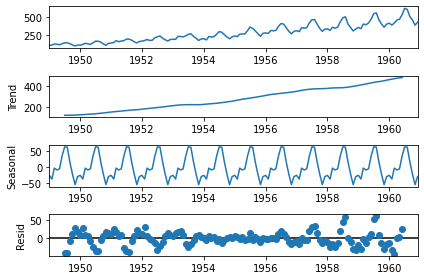

In [3]:
#импортируем библиотеку 
from statsmodels.tsa.seasonal import seasonal_decompose
#производим декомпозицию временного ряда 
decomposition = seasonal_decompose(df)
fig = decomposition.plot()
plt.show()

In [17]:
def exp_smth(x_t_1, a, s_t_1):
	return a*x_t_1+(1-a)*s_t_1
data = np.array([15, 20, 25, 30, 25, 27])
a = 0.7
s = np.zeros(7)
s[0] = data[0]
for t, x_t in enumerate(data):
	s[t+1] = exp_smth(x_t, a, s[t])
print(s)

[15.      15.      18.5     23.05    27.915   25.8745  26.66235]


In [18]:
def exp_smth(x_t, a, s_t_1):
    return a * x_t + (1 - a) * s_t_1

data = np.array([15, 20, 25, 30, 25, 27])
a = 0.7
s = np.zeros(7)
s[0] = data[0]

for t, x_t in enumerate(data[1:]):
    s[t] = exp_smth(x_t, a, s[t - 1])

print(s)

[14.     21.7    27.51   25.753  26.6259  0.      0.    ]


In [7]:
from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(data)

alpha = 0.7

model = ses.fit(smoothing_level = alpha, optimized = False)

forecast = model.forecast(1)

print(forecast)

[26.66235]


# Тест Дики — Фуллера
Тест на проверку временного ряда на стационарность расширенный 

нулевая гипотеза (H0): временной ряд нестационарный, то есть имеет некоторый тренд и сезонную компоненту;
альтернативная гипотеза (H1): временной ряд стационарный, то есть не имеет тренда и сезонной компоненты, и данные скорее случайны.
В результате проведения теста мы получим несколько значений: значение статистики из теста и критические значения разных уровней значимости (1 %, 2 %, 3 %). Уровень значимости означает допустимую  для данной задачи вероятность ошибки, то есть чем ниже уровень значимости, тем ниже вероятность ошибочного результата теста.

Если значение статистики ниже критического значения выбранного уровня значимости, отвергаем гипотезу H0 и принимаем гипотезу H1 (ряд стационарный).
Если значение статистики выше критического значения выбранного уровня значимости, принимаем гипотезу H0 (ряд нестационарный).

In [23]:
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv(
	"data/daily-total-female-births.csv", 
    header=0, 
    index_col=0
).squeeze("columns")

result = adfuller(df.values)

print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")

for key, value in result[4].items():
	print(f"\t{key}: {value:.3f}")

ADF Statistic: -4.808291253559764
p-value: 5.2434129901498554e-05
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [24]:
df_diff_1 = df.diff().dropna()

In [25]:
test1 = adfuller(df_diff_1)
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  -12.62517863387137
p-value:  1.5472400091967894e-23
Critical values:  {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}
ряд стационарен


* Лаг — это предыдущее наблюдение (например, лаг в шесть дней относительно сегодняшнего дня указывает на значение чего-либо, полученное шесть дней назад).
* Положительная корреляция — это отношение, при котором увеличение одного значения предсказывает увеличение другого.
* Отрицательная корреляция — это отношение, при котором увеличение одного значения предсказывает уменьшение другого.
* Доверительный интервал — это рассчитанный диапазон значений, в котором, вероятно, будет содержаться неизвестное (предсказанное) значение для наших данных.
* Уровень достоверности — это вероятность того, что доверительный интервал будет содержать наблюдаемое значение (фактическое значение для предсказания).

График автокорреляций разного порядка называется коррелограмма. Его довольно просто построить с помощью метода plot_acf из пакета statsmodels.graphics.tsaplots. Методу необходимо передать всё тот же временной ряд с индексом-датой.

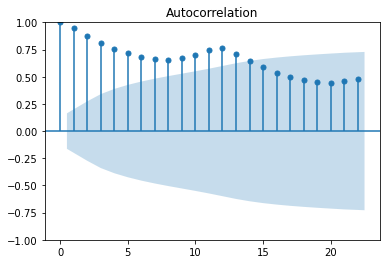

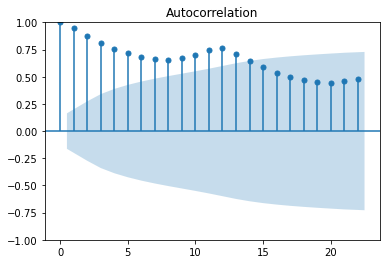

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
# df = pd.read_csv("AirPassengers.csv", index_col='Month', parse_dates=['Month'])
plot_acf(df_air)

# AR-МОДЕЛИРОВАНИЕ НА PYTHON 
Для загрузки класса ar_model.AutoReg, который применяется для обучения одномерной авторегрессионной модели порядка p, используется пакет statsmodels.tsa.

Признаки в данных:

* Date — дата (в формате гггг-мм-дд);
* Consumption — потребление электроэнергии (ГВтч);
* Wind — производство ветровой энергии (ГВтч);
* Solar — производство солнечной энергии (ГВтч);
* Wind+Solar — сумма производства ветровой и солнечной энергии (ГВтч).

В качестве примера построим предсказание объёма потребления электроэнергии на три месяца (возьмём последние 100 дней).

In [34]:
from statsmodels.tsa.ar_model import AutoReg

url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url, sep=",")

При использовании статистических моделей временные ряды нельзя делить на обучающую и тестовую выборки случайным образом. Так как нам важно сохранять последовательность, разделим данные на обучающую и тестовую выборки упорядоченно, то есть возьмём в качестве тестовой выборки последние 100 значений. Остальные данные будем использовать для обучения.

In [35]:
train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]

Инициализируем и обучим модель. Возьмём lags=8 (AR(8)) — на практике же будем определять это значение по графику частичной автокорреляции:

In [36]:
ar_model = AutoReg(train_data, lags=8).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Mon, 27 Feb 2023   AIC                          48483.625
Time:                        20:15:10   BIC                          48547.230
Sample:                             8   HQIC                         48506.095
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

Сделаем предсказание. Метод predict требует два обязательных параметра — метки начала и окончания предсказания. Метка начала предсказания будет равна количеству данных в обучающей выборке, так как нас интересует прогноз со следующего дня. Метка окончания в нашем случае будет равна len(train_data)+100, что эквивалентно len(df)-1, так как len(df) = len(train_data) + len(test_data).

In [37]:
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)